In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
dir = '/content/drive/MyDrive/Bunga'
categories = ['Mawar', 'Tulip']

In [ ]:
data = []
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        bunga_img = cv2.imread(imgpath, cv2.IMREAD_COLOR)  # Use cv2 to read the image in color mode
        try:
            bunga_img = cv2.resize(bunga_img, (50, 50))
            image = np.array(bunga_img).flatten()
            data.append([image, label])
        except Exception as e:
            pass

In [ ]:
file_path = '/content/tulip_00063.jpg'

def load_and_process_image(file_path):
    try:
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (50, 50))
        img = np.array(img).flatten()
        return img
    except Exception as e:
        print("Error:", str(e))
        return None

In [ ]:
features = []
labels = []
for feature, label in data:
    features.append(feature)
    labels.append(label)

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.50)

model = SVC(C=1,kernel = 'poly', gamma= 'auto')
model.fit(xtrain, ytrain)

Accuracy:  0.92
Prediction:  Tulip


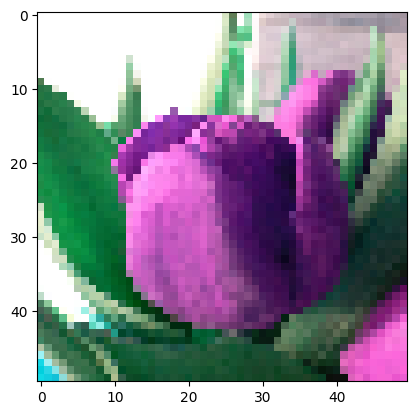

In [ ]:
new_image = load_and_process_image(file_path)

prediction = model.predict([new_image])
predicted_category = categories[prediction[0]]
accuracy = model.score(xtest, ytest)

categories = ['Mawar', 'Tulip']
print('Accuracy: ', accuracy)
print('Prediction: ', predicted_category)

bunga_new = new_image.reshape(50, 50, 3)
plt.imshow(bunga_new)
plt.show()
